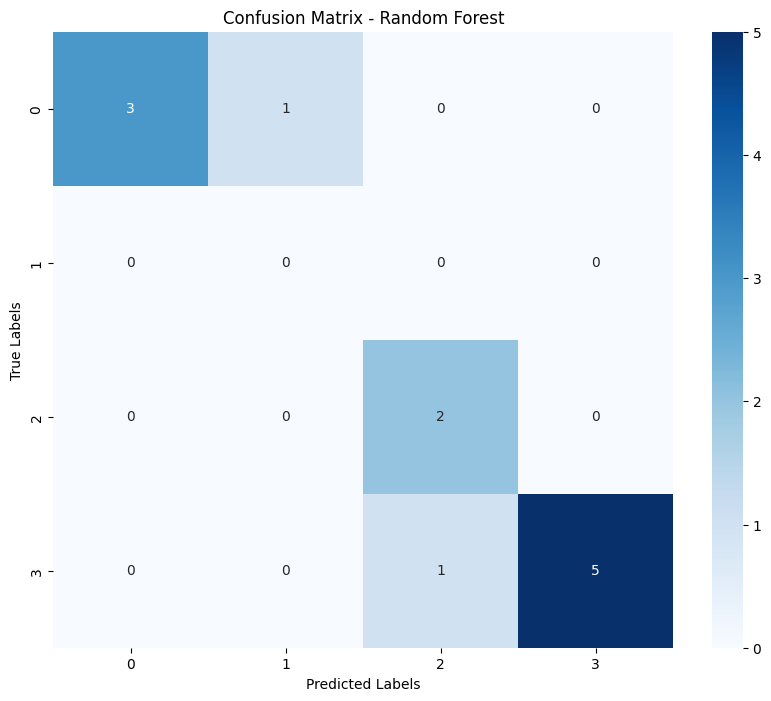

              precision    recall  f1-score    support
0              1.000000  0.750000  0.857143   4.000000
1              0.000000  0.000000  0.000000   0.000000
2              0.666667  1.000000  0.800000   2.000000
3              1.000000  0.833333  0.909091   6.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.666667  0.645833  0.641558  12.000000
weighted avg   0.944444  0.833333  0.873593  12.000000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

processed_train_df = pd.read_csv('Processed_TrainSet.csv')
y = processed_train_df['class']
X = processed_train_df.drop(columns=['class'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

best_features = ["SFm", "Km", "Asm", "FMm"]

best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train[best_features], y_train)
predictions = best_model.predict(X_val[best_features])

cm = confusion_matrix(y_val, predictions)
report = classification_report(y_val, predictions, output_dict=True, zero_division=0)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

classification_report_df = pd.DataFrame(report).transpose()
print(classification_report_df)